In [74]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [76]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Scratch

## Test 0

In [77]:
num = 0
reps = 100
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [89]:
np.random.seed(666)
X_bkgd = bkgd.rvs(size = N)
X_sgnl = sgnl.rvs(size = N)

D = np.concatenate([X_bkgd, X_sgnl])
print(np.mean(X_bkgd, axis = 0), np.mean(X_sgnl, axis = 0), np.mean(D, axis = 0))
print(np.std(X_bkgd, axis = 0), np.std(X_sgnl, axis = 0), np.std(D, axis = 0))

[-9.98916686e-02 -3.60279754e-06] [ 0.0989831  -0.00052094] [-0.00045428 -0.00026227]
[1.0005475 0.9997753] [0.99966816 0.99946427] [1.00503913 0.99961983]


In [90]:
0.5 * (np.mean(X_bkgd, axis = 0) + np.mean(X_sgnl, axis = 0))

array([-0.00045428, -0.00026227])

In [111]:
XX = np.vstack([np.mean(X_bkgd, axis = 0), np.mean(X_sgnl, axis = 0)])
( (np.var(X_bkgd, axis = 0) + np.var(X_sgnl, axis = 0)) / 2 + np.var(XX, axis = 0) ) ** 0.5

array([1.00503913, 0.99961983])

In [105]:
np.var(X_bkgd, axis = 0)**0.5

array([1.0005475, 0.9997753])

array([[-9.98916686e-02, -3.60279754e-06],
       [ 9.89831033e-02, -5.20935639e-04]])

In [98]:
np.mean(X_bkgd, axis = 0).reshape(2, -1)

array([[-9.98916686e-02],
       [-3.60279754e-06]])

array([[-9.98916686e-02,  9.89831033e-02],
       [-3.60279754e-06, -5.20935639e-04]])

In [82]:
np.mean(X_bkgd, axis = 0)

array([-0.1012994 ,  0.00045278])

In [79]:
make_data(bkgd, sgnl, N)

[array([[ 0.96557347, -1.33729071],
        [ 0.1815315 ,  0.74252355],
        [ 0.70127813,  0.73357231],
        ...,
        [ 1.23829988,  0.2686389 ],
        [-1.25838599,  0.57074306],
        [-0.73772603,  0.14987412]]),
 array([[-1.13605458, -0.46965998],
        [ 0.23445735, -1.95200281],
        [-1.89362118,  1.08084283],
        ...,
        [ 0.84944206, -0.60603936],
        [ 0.79059895, -0.49301156],
        [ 0.60745564,  1.59674539]]),
 array([0., 0., 0., ..., 1., 0., 0.]),
 array([1., 1., 0., ..., 1., 1., 1.])]

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 1

In [ ]:
num = 1
reps = 100
N = 10**6

b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])
sg = 2*np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 2

In [ ]:
num = 2
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 3

In [ ]:
num = 3
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 4

In [ ]:
num = 4
reps = 100
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

# Performance

In [41]:
reps = 100

bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

In [42]:
g = np.meshgrid(np.linspace(-2, 2, 401), np.linspace(-2, 2, 401))
g = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis = 1)

aa, bb = np.meshgrid(np.linspace(-2.005, 2.005, 402), np.linspace(-2.005, 2.005, 402))

In [43]:
x = np.linspace(-2, 2, 4001)
y = np.linspace(-2, 2, 4001)
xx, yy = np.meshgrid(x, y)

pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

## Test 0

### Load

In [44]:
num = 0
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [37]:
mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

In [38]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [39]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

(0.99964445, 0.99986845)

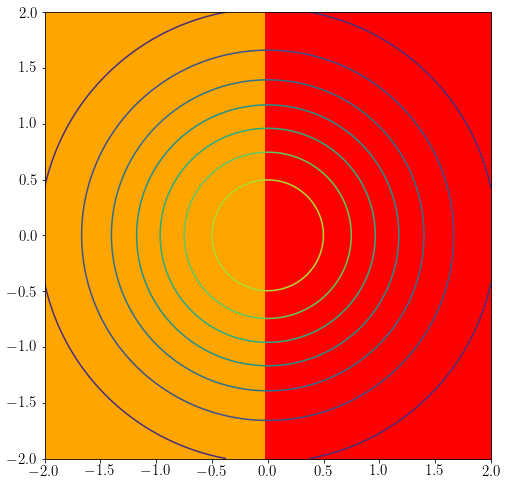

In [40]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### MAE

In [ ]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

### Plots

In [45]:
m = np.mean(bkgd.mean + sgnl.mean)
s = ( np.mean(bkgd.cov + sgnl.cov) + np.var(np.append(bkgd.mean, sgnl.mean)) )**0.5

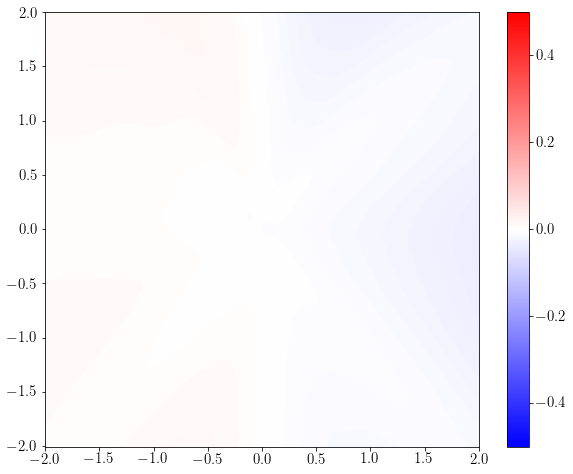

In [46]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = (g - m) / s))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

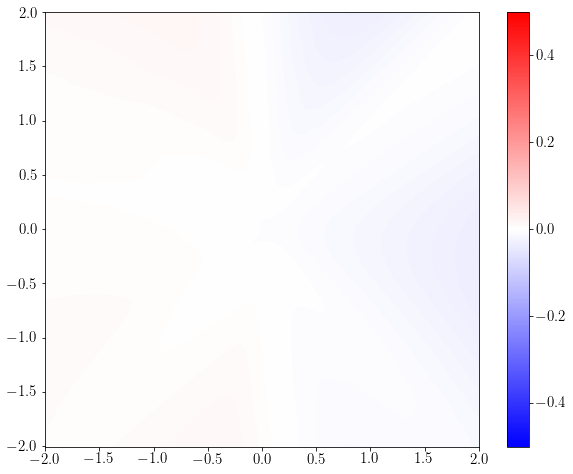

In [47]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = (g - m) / s))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

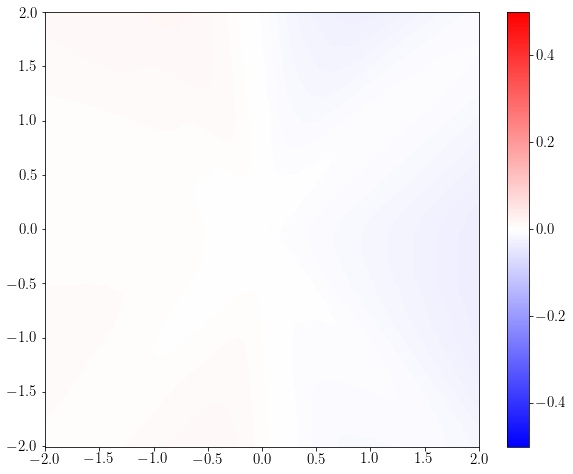

In [48]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = (g - m) / s))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

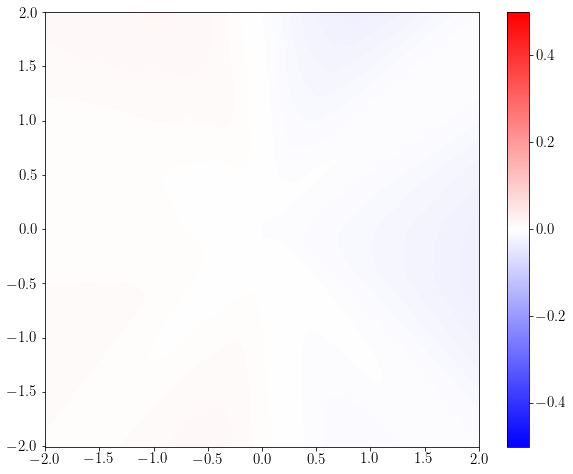

In [49]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = (g - m) / s))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 1

### Load

In [50]:
# Test 1
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])

bkgd = stats.multivariate_normal(mu_bkgd, np.eye(2))
sgnl = stats.multivariate_normal(mu_sgnl, np.eye(2))

num = 1

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [ ]:
b = 0.1 / (2 ** (0.5))
mu_bkgd = np.array([-b, b])
mu_sgnl = np.array([b, -b])

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

In [ ]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [ ]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

In [ ]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### MAE

In [ ]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

### Plots

In [51]:
m = np.mean(bkgd.mean + sgnl.mean)
s = ( np.mean(bkgd.cov + sgnl.cov) + np.var(np.append(bkgd.mean, sgnl.mean)) )**0.5

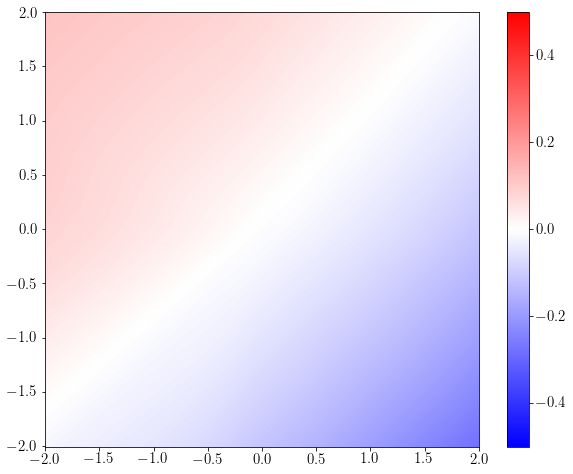

In [52]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = (g - m) / s))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

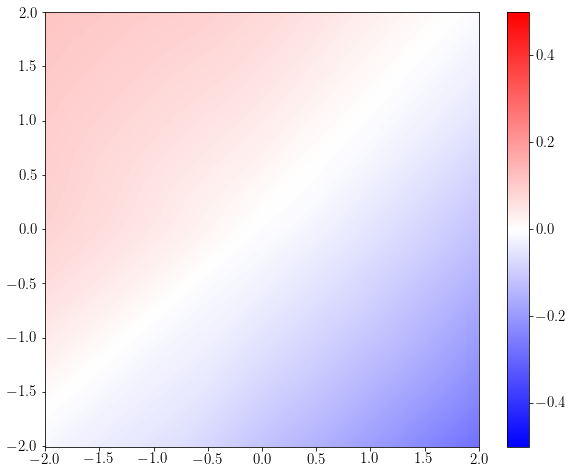

In [53]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = (g - m) / s))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

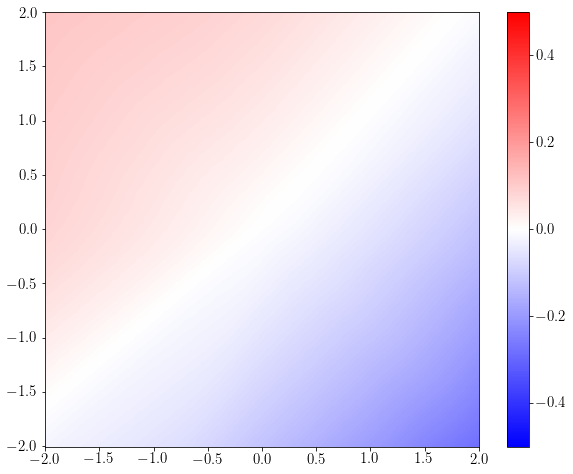

In [54]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = (g - m) / s))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

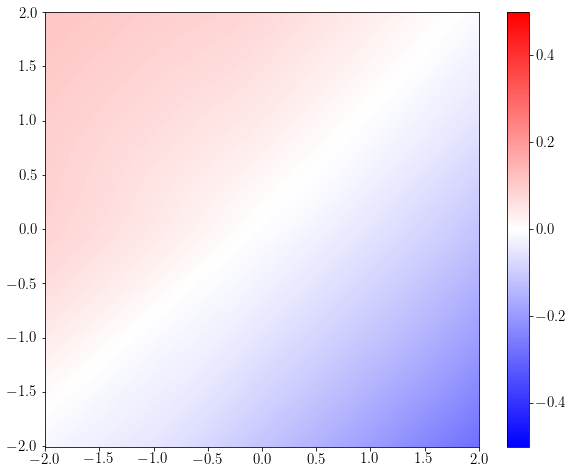

In [55]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = (g - m) / s))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 2

### Load

In [56]:
# Test 2
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 2

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [ ]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [ ]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [ ]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

In [ ]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### MAE

In [ ]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

### Plots

In [57]:
m = np.mean(bkgd.mean + sgnl.mean)
s = ( np.mean(bkgd.cov + sgnl.cov) + np.var(np.append(bkgd.mean, sgnl.mean)) )**0.5

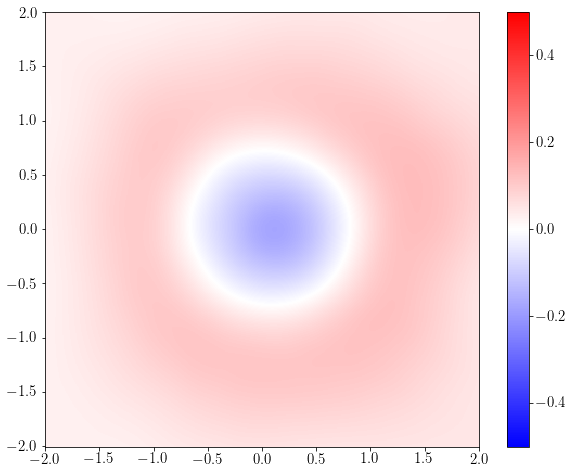

In [58]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = (g - m) / s))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

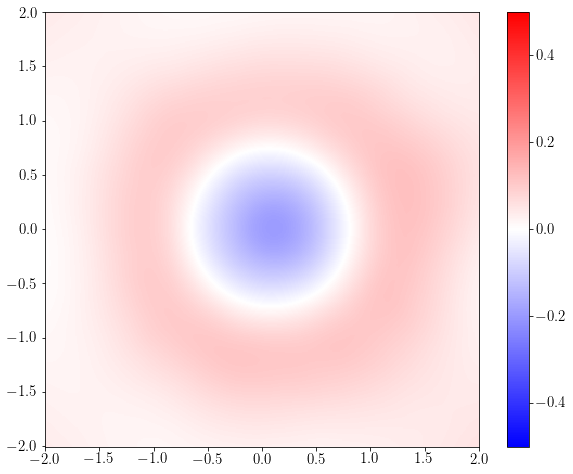

In [59]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = (g - m) / s))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

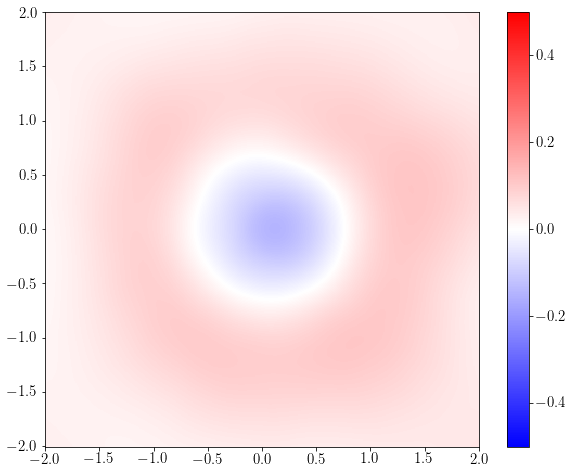

In [60]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = (g - m) / s))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

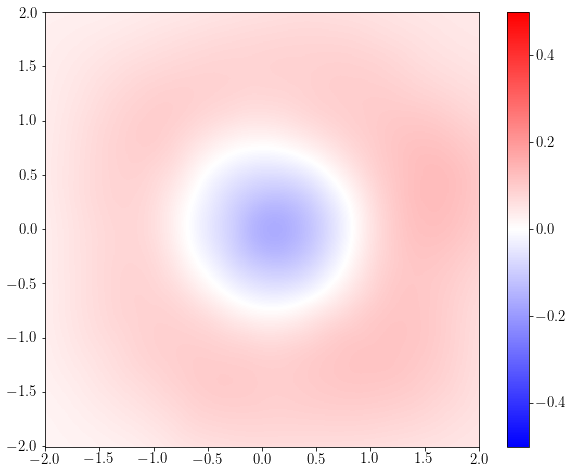

In [61]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = (g - m) / s))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 3

### Load

In [62]:
# Test 3
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 3

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [ ]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [ ]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [ ]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

In [ ]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### MAE

In [ ]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

### Plots

In [63]:
m = np.mean(bkgd.mean + sgnl.mean)
s = ( np.mean(bkgd.cov + sgnl.cov) + np.var(np.append(bkgd.mean, sgnl.mean)) )**0.5

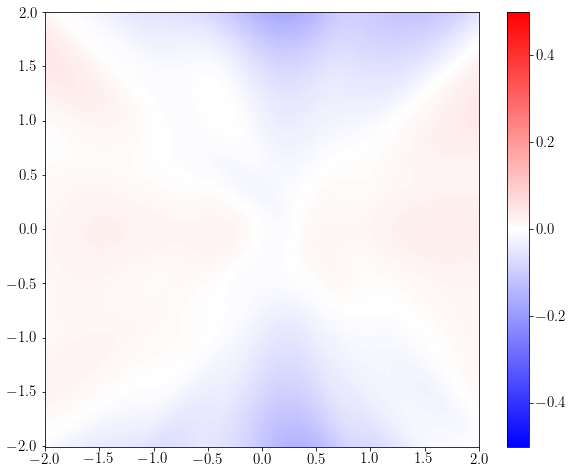

In [64]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = (g - m) / s))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

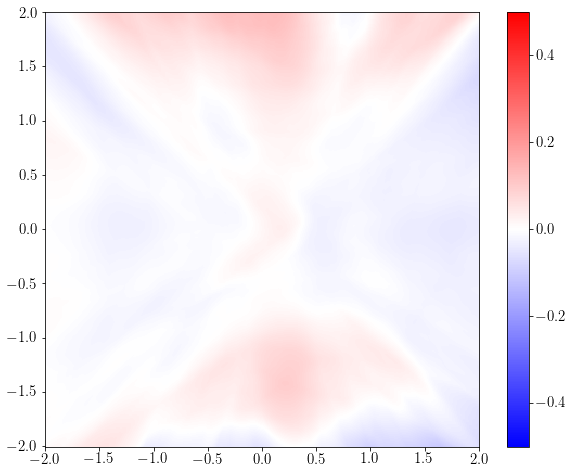

In [65]:
plt.figure(figsize = (10, 8))
dd = (lr(g) - mse_lr((g - m) / s)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

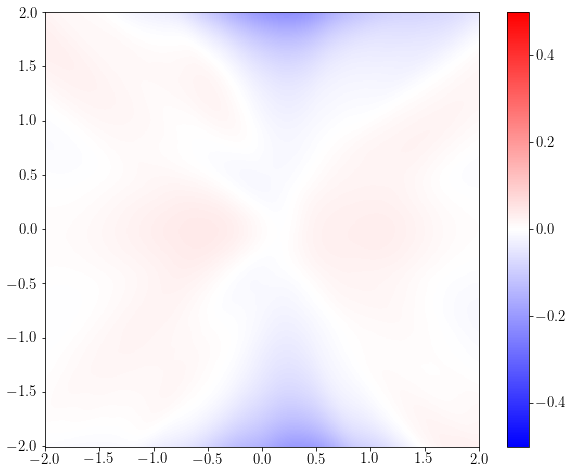

In [66]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = (g - m) / s))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

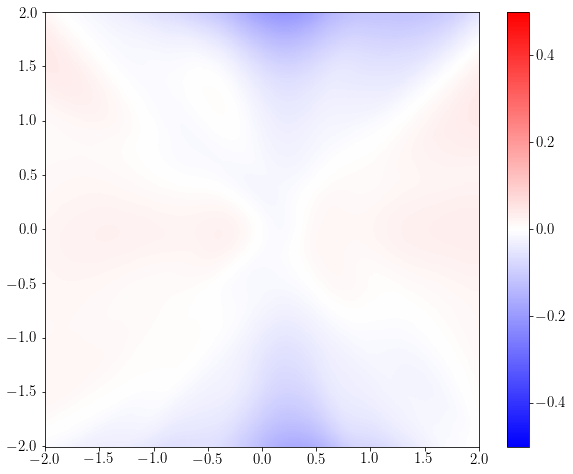

In [67]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = (g - m) / s))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

## Test 4

### Load

In [68]:
# Test 4

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 4

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

### Visualize Distribution

In [ ]:
mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0.25], [0.25, 1]])
sg_sgnl = np.array([[2, -0.25], [-0.25, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

In [ ]:
D = np.concatenate([bkgd.rvs(size = 10**7), sgnl.rvs(size = 10**7)])
X = D[:, 0]
Y = D[:, 1]
b = 4

In [ ]:
np.mean(X**2 + Y**2 < b**2), np.mean((X > -b) & (X < b) & (Y > -b) & (Y < b))

In [ ]:
plt.figure(figsize = (8, 10))
plt.contour(xx, yy, 0.5 * (bkgd.pdf(pos) + sgnl.pdf(pos)))
cc = pos[sgnl.pdf(pos) / bkgd.pdf(pos) < 1]
dd = pos[sgnl.pdf(pos) / bkgd.pdf(pos) > 1]
plt.scatter(cc[:, 0], cc[:, 1], c = 'orange')
plt.scatter(dd[:, 0], dd[:, 1], c = 'red')
plt.gca().set_aspect('equal')

### MAE

In [ ]:
bce_avg = np.mean([mae(lr) for lr in bce_lrs])
mse_avg = np.mean([mae(lr) for lr in mse_lrs])
mlc_avg = np.mean([mae(lr) for lr in mlc_lrs])
sqr_avg = np.mean([mae(lr) for lr in sqr_lrs])

print('MAEs')
print('BCE:\t', bce_avg)
print('MSE:\t', mse_avg)
print('MLC:\t', mlc_avg)
print('SQR:\t', sqr_avg)

### Plots

In [69]:
m = np.mean(bkgd.mean + sgnl.mean)
s = ( np.mean(bkgd.cov + sgnl.cov) + np.var(np.append(bkgd.mean, sgnl.mean)) )**0.5

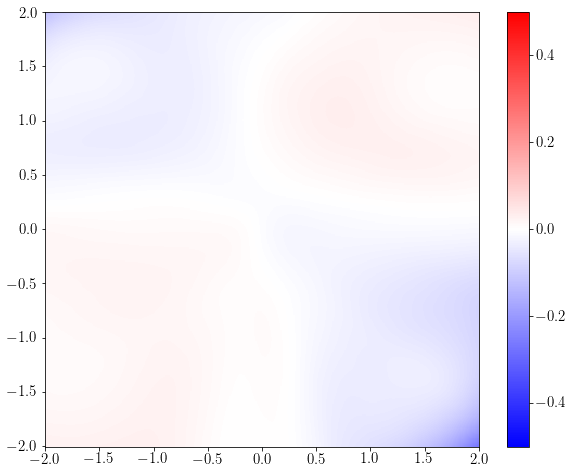

In [70]:
plt.figure(figsize = (10, 8))
avg_bce = avg_lr(get_preds(bce_lrs, xs = (g - m) / s))[0]
dd = (avg_bce - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

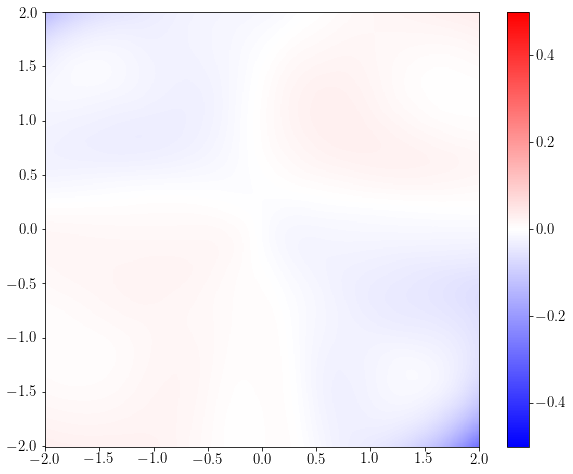

In [71]:
plt.figure(figsize = (10, 8))
avg_mse = avg_lr(get_preds(mse_lrs, xs = (g - m) / s))[0]
dd = (avg_mse - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

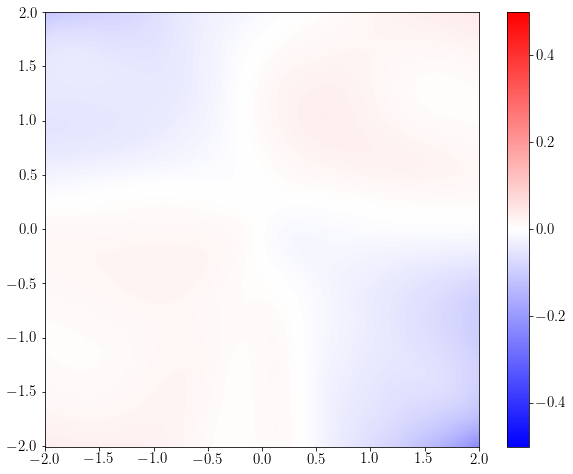

In [72]:
plt.figure(figsize = (10, 8))
avg_mlc = avg_lr(get_preds(mlc_lrs, xs = (g - m) / s))[0]
dd = (avg_mlc - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')

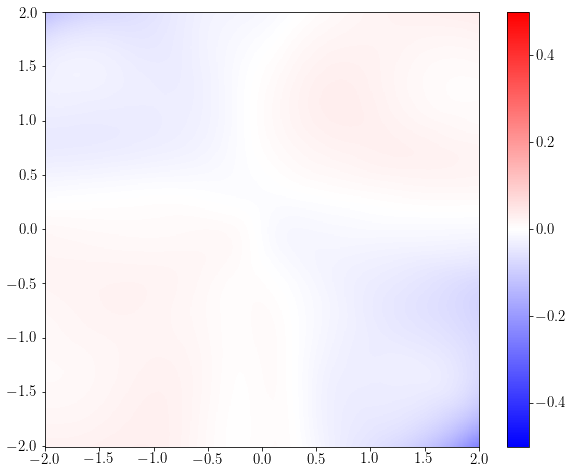

In [73]:
plt.figure(figsize = (10, 8))
avg_sqr = avg_lr(get_preds(sqr_lrs, xs = (g - m) / s))[0]
dd = (avg_sqr - lr(g)).reshape(401, 401)
plt.pcolormesh(aa, bb, dd, cmap = 'bwr', shading = 'auto', vmin = -0.5, vmax = 0.5)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=600, 
            bbox_inches='tight')